<a href="https://www.kaggle.com/code/hutariandn/kelompok-5-dmbiui-study-case-5?scriptVersionId=211689759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the datasets
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

print("Informasi awal dataset:")
print(train.info())

train_clean = train.copy()

#Preprocessing
for col in train_clean.select_dtypes(include=['float64', 'int64']).columns:
    train_clean[col].fillna(train_clean[col].median(), inplace=True)

for col in train_clean.select_dtypes(include=['object']).columns:
    train_clean[col].fillna(train_clean[col].mode()[0], inplace=True)

labelencoder = LabelEncoder()
for col in train_clean.select_dtypes(include=['object']).columns:
    train_clean[col] = labelencoder.fit_transform(train_clean[col])

print("\nJumlah nilai NaN setelah pembersihan:")
print(train_clean.isnull().sum())

print("\nInformasi dataset setelah pembersihan:")
print(train_clean.info())
print(train_clean.head())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

/tmp/ipykernel_17/3503803175.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(train_clean[col].median(), inplace=True)
/tmp/ipykernel_17/3503803175.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [8]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train_clean.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,69.863699,10516.828082,0.995890,0.028082,1.942466,2.777397,0.000685,...,2.758904,1.995890,1.889726,1.996575,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,22.027677,9981.264932,0.063996,0.165264,1.409156,0.707666,0.026171,...,40.177307,0.082687,0.440610,0.086762,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,69.000000,9478.500000,1.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,0.000000,3.000000,3.000000,0.000000,...,0.000000,2.000000,2.000000,2.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,1.000000,3.000000,3.000000,1.000000,...,738.000000,2.000000,3.000000,3.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


# EDA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


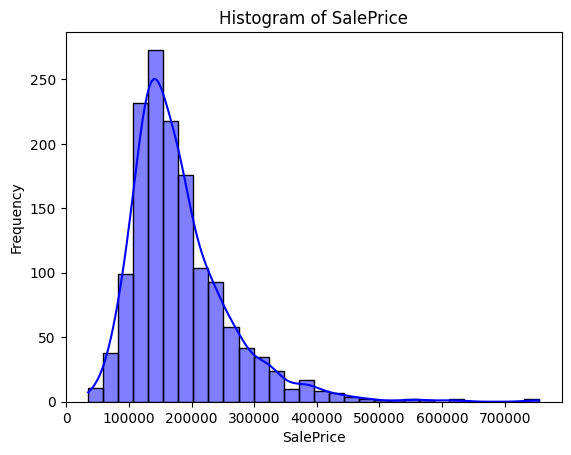

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with seaborn
sns.histplot(train_clean['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

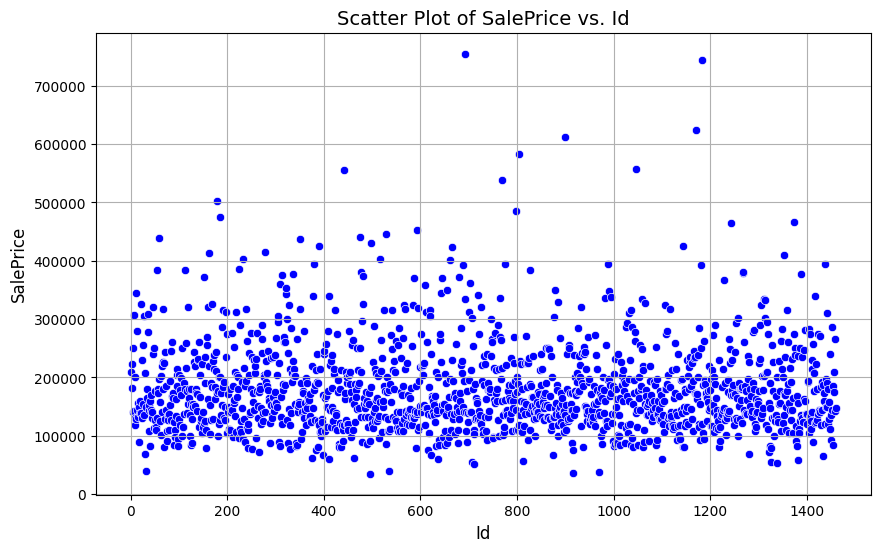

In [11]:
# Assuming SalePriceCleaned is a DataFrame
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.scatterplot(data=train_clean, x='Id', y='SalePrice', color='blue')

# Customize the plot
plt.title('Scatter Plot of SalePrice vs. Id', fontsize=14)
plt.xlabel('Id', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.grid(True)

plt.show()

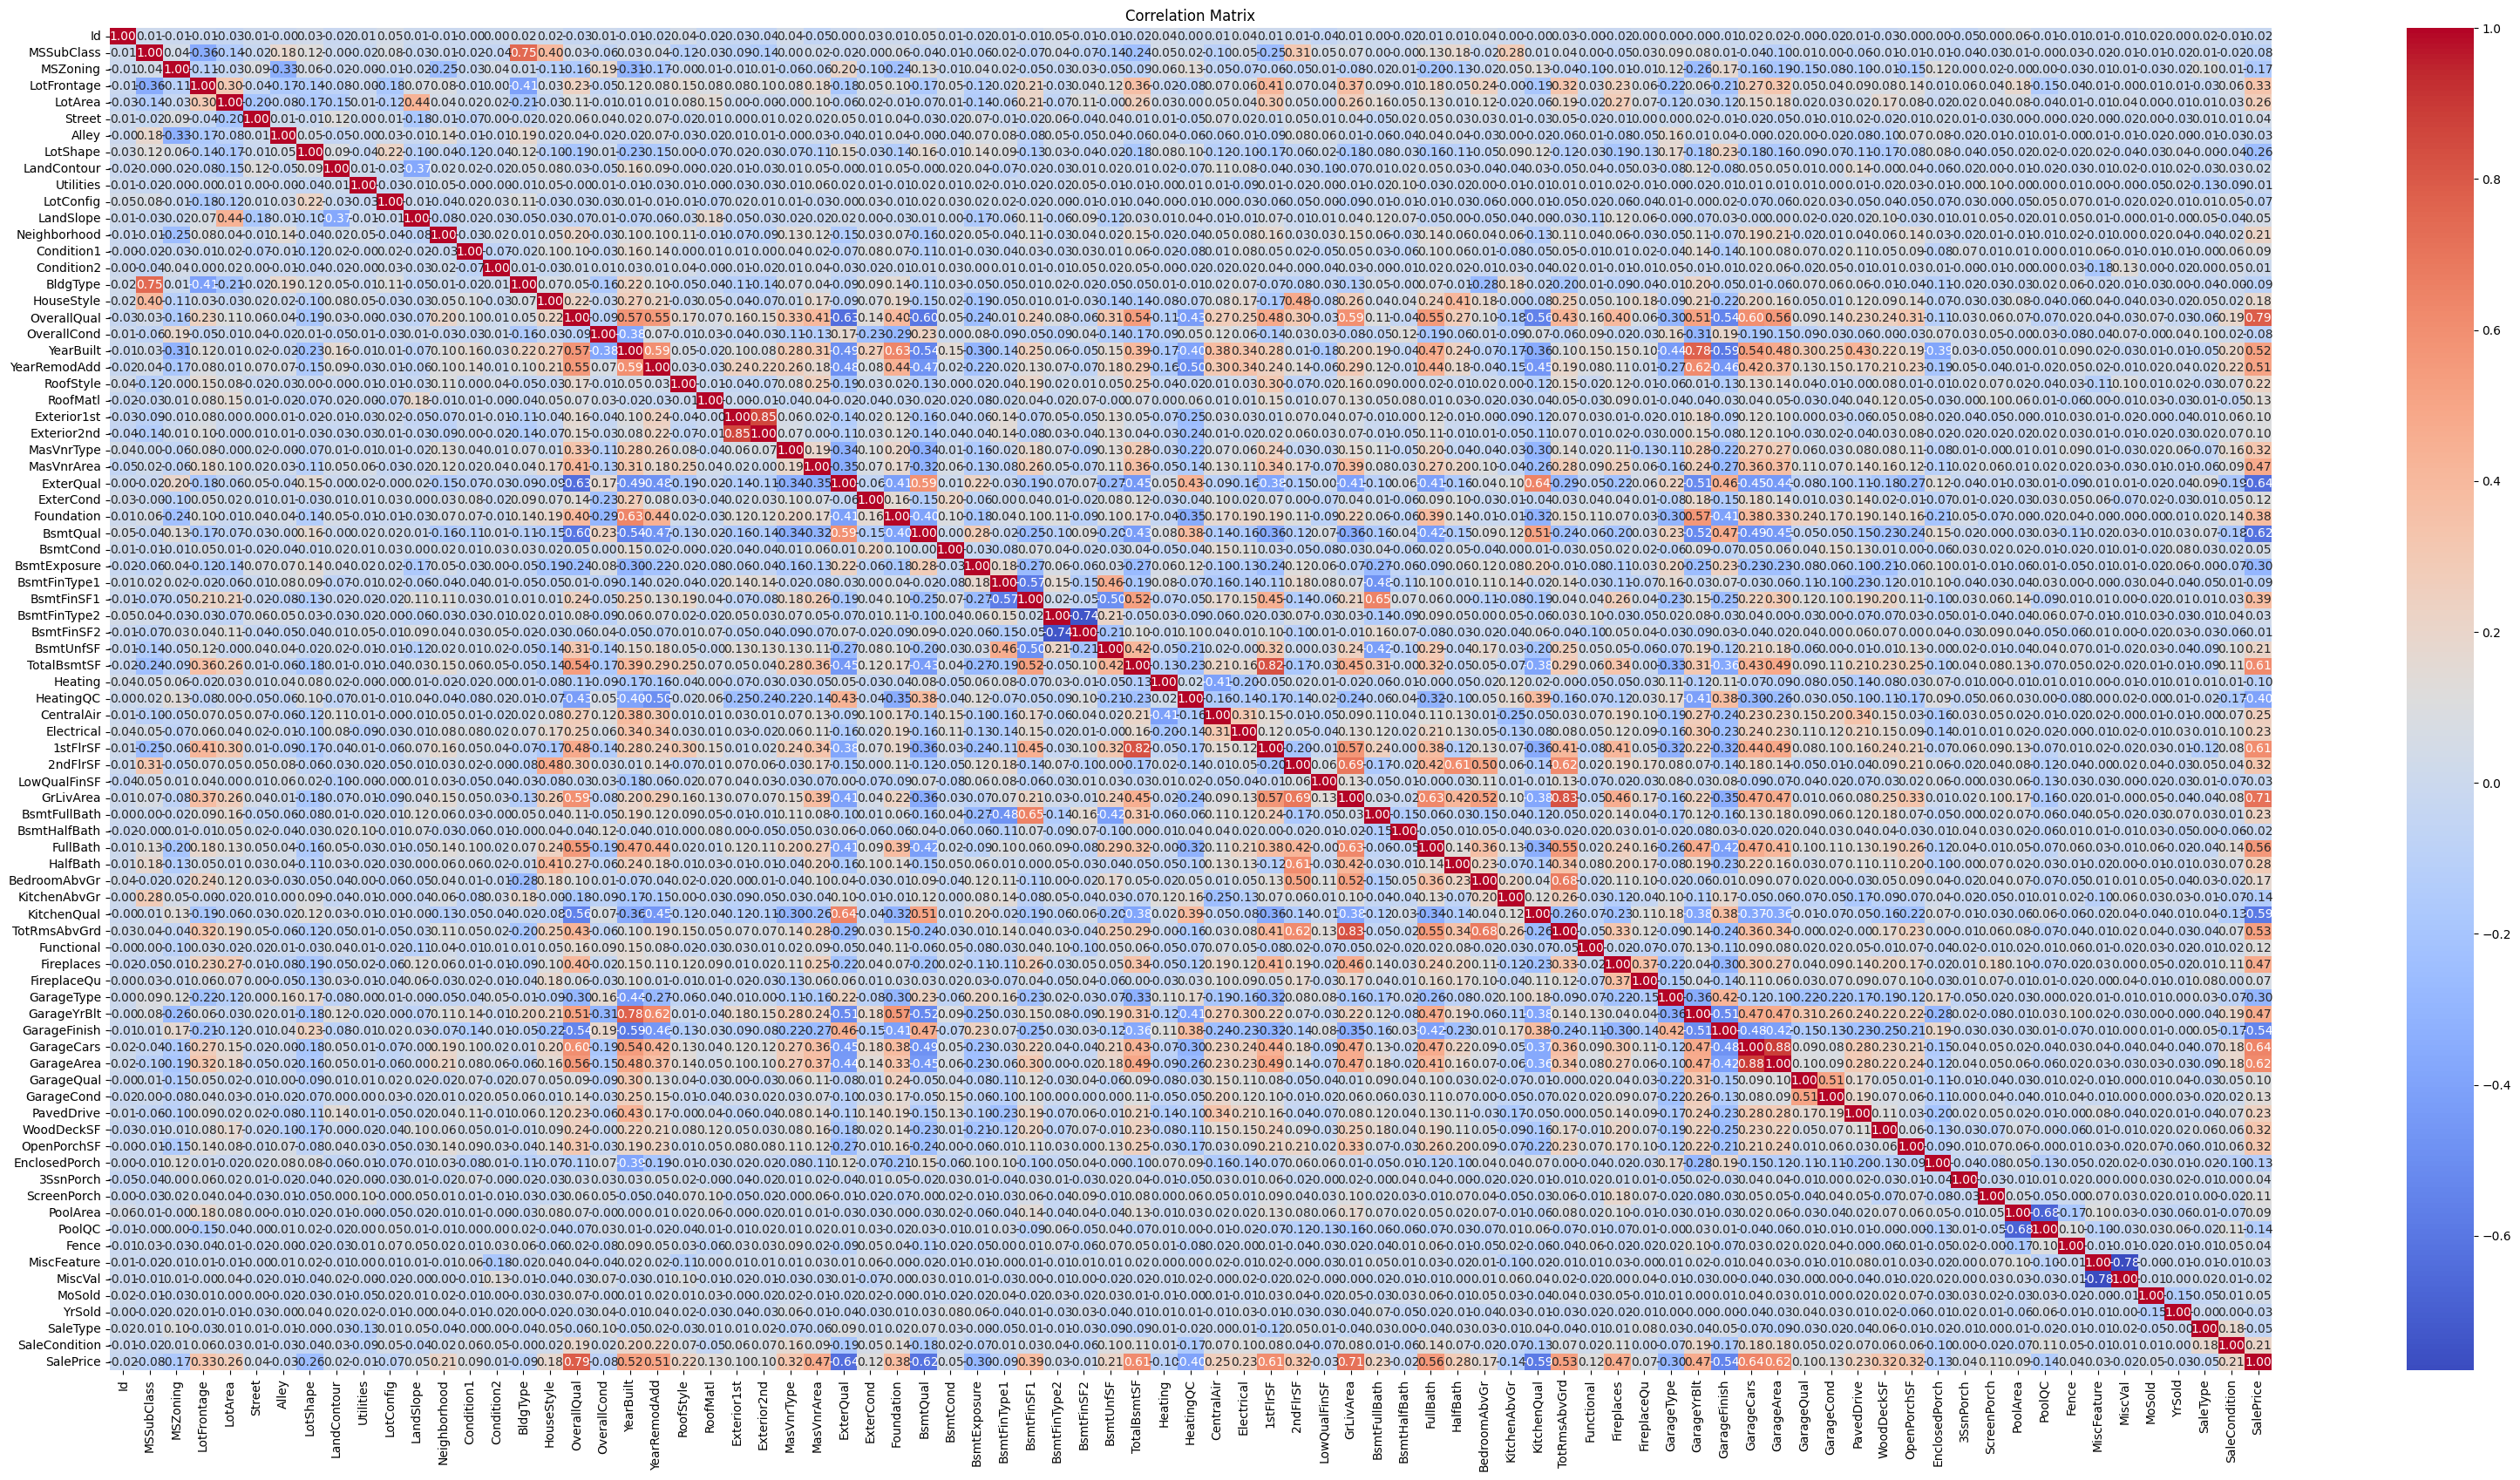

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = train_clean.copy()

categorical_columns = df.select_dtypes(include=['object']).columns
labelencoder = LabelEncoder()

for col in categorical_columns:
    try:
        df[col] = labelencoder.fit_transform(df[col].astype(str))
    except Exception as e:
        print(f"Error encoding {col}: {e}")

X = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = X.corr()

plt.figure(figsize=(40, 20))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [13]:
train_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Modelling

In [14]:
# Separate target variable (SalePrice) and features (X)
y = np.log1p(train_clean["SalePrice"])  # Log-transform SalePrice
X = train_clean.drop(["SalePrice", "Id"], axis=1)

# Drop the 'Id' column from test data
test_ids = test["Id"]
test = test.drop("Id", axis=1)

Kami melakukan tranformasi variabel pada variabel target yang diinginkan. Hal ini ditujukan untuk meningkatkan performa model yang akan digunakan.

In [15]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

# Assuming you already have X_train and y_train
# Split the original training data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Now you have X_train_split and y_train_split for training and X_val_split and y_val_split for validation

# Data Scalling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)

# Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [19]:
# print the intercept
print(lin_reg.intercept_)

12.030659086742059


In [20]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MSSubClass,-0.013659
MSZoning,-0.016624
LotFrontage,-0.021881
LotArea,0.012864
Street,0.003971
...,...
MiscVal,-0.003645
MoSold,0.000364
YrSold,-0.007694
SaleType,-0.002252


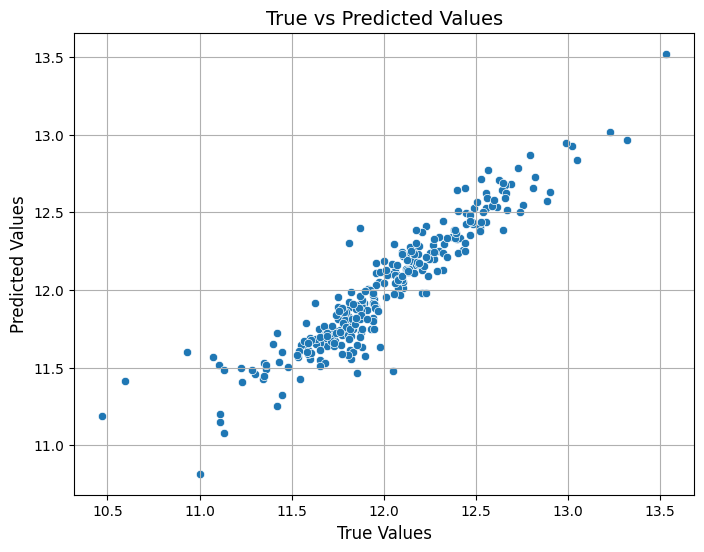

In [21]:
# Assuming pred and y_val are already defined
pred = lin_reg.predict(X_val)

# Create a DataFrame with True Values and Predicted Values
results = pd.DataFrame({'True Values': y_val, 'Predicted Values': pred})

# Plot the results using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the plot size
sns.scatterplot(data=results, x='True Values', y='Predicted Values')

# Customize the plot
plt.title('True vs Predicted Values', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)

plt.show()

/tmp/ipykernel_17/97365786.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(error_values, shade=True, color='blue')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


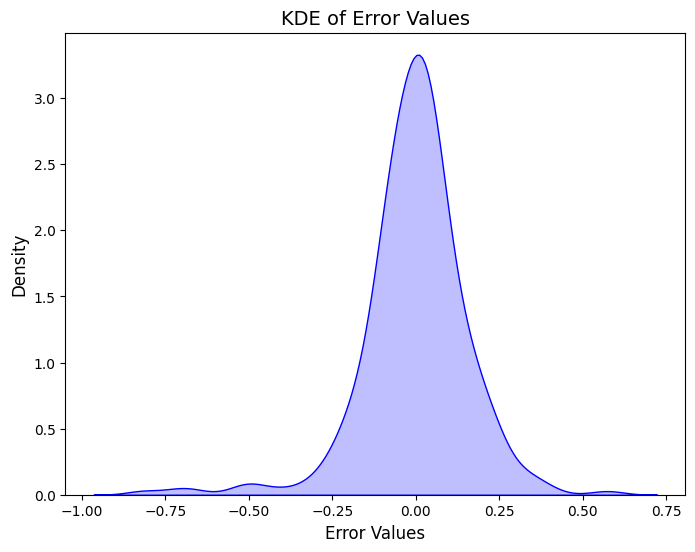

In [22]:
# Assuming pred and y_test are already defined
error_values = y_val - pred

# Plot the error values using Seaborn's kdeplot
plt.figure(figsize=(8, 6))  # Optional: Set the plot size
sns.kdeplot(error_values, shade=True, color='blue')

# Customize the plot
plt.title('KDE of Error Values', fontsize=14)
plt.xlabel('Error Values', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

^Dapat dilihat bahwa sebaran nilai error terlihat mendekati berdistribusi normal, yang mana jika kita perhatikan sebagian besar nilai error berpusat pada sekitar nilai 0. Mengindikasikan bahwa model linear biasa ini memiliki tingkat kesalahan yang kecil atau bias yang minimal.

**Evaluation Metrics**

In [23]:
val_pred = lin_reg.predict(X_val)
train_pred = lin_reg.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_val, val_pred) , cross_val(LinearRegression())]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Validation set evaluation:
_____________________________________
MAE: 0.10600651130522695
MSE: 0.02412049777106281
RMSE: 0.15530775180609244
R2 Square 0.8707444939151853
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08941558493508688
MSE: 0.017060058924203855
RMSE: 0.13061416050414998
R2 Square 0.8880885176763107
__________________________________


Apabila diperhatikan pada hasil evaluation metrics yang dimiliki oleh model ini,model memiliki performa yang baik secara keseluruhan, dengan nilai R^2 yang cukup tinggi baik pada train maupun validation set. Hal ini menunjukkan bahwa model berhasil menjelaskan mayoritas variabilitas dalam data. Akan tetapi, terdapat sedikit penurunan performa model pada validation set dibandingkan dengan train set, tetapi masih dalam batas wajar. Hal ini menandakan bahwa model tidak mengalami permasalahan overfitting yang mengkhawatirkan.  

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_val)

val_pred = model.predict(X_val)
train_pred = model.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_val, val_pred) , cross_val(Ridge())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.10405692946540722
MSE: 0.023256294676754424
RMSE: 0.1525001464810917
R2 Square 0.8753755346745888
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08890145996762235
MSE: 0.017327790857912563
RMSE: 0.1316350669765187
R2 Square 0.886332235491129
__________________________________


* Tidak jauh berbeda hal nya dengan linear model regression yang sebelumnya, R^2 pada model Ridge regression ini cukup tinggi baik pada train dan validation set. Hal ini menunjukkan bahwa model ini dapat menjelaskan mayoritas variabilitas dalam data.
* Permasalahan yang sama pun juga muncul dengan linear model pada bagian sebelumnya yakni yang mengindikasikan kenaikan nilai evaluation metrics pada MAE, MSE, dan RMSE data. Akan tetapi kenaikan ini masih berada pada dalam batas wajar, yang mana hal ini tidak terlalu mengindikasikan terjadinya overfitting dalam data.

# LASSO Regresion

In [25]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1,
              precompute=True,
#               warm_start=True,
              positive=True,
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

val_pred = model.predict(X_val)
train_pred = model.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_val, val_pred) , cross_val(Lasso())]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.17109438533333576
MSE: 0.05794995979050479
RMSE: 0.24072797882777314
R2 Square 0.6894611607351453
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.16333098734978324
MSE: 0.04857773263814847
RMSE: 0.22040356766202418
R2 Square 0.6813372045423485
__________________________________


Interpretasi:
- Hasi validationt set menunjukkan nilai R^2 68.96% dan train set 8.136%. Ini menunjukkan bahwa model memiliki kemampuan prediksi yangtidak terlalu baik, karena jumlah variabilitas dalam data yang dapat dijelaskan oleh model ini tidak terlalu besark.
- Kedua set menunjukkan nilai MAE, MSE, dan RMSE memiliki nilai yang mirip/mendekati. Maka, model tidak mengalami overfitting atau underfitting.

# Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_val_2_d = poly_reg.transform(X_val)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

val_pred = lin_reg.predict(X_val_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_val, val_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.17979528353343807
MSE: 0.06981059622025909
RMSE: 0.2642169491540221
R2 Square 0.625903079191112
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.3778932333019067e-15
MSE: 4.4846202146126014e-30
RMSE: 2.117692190714364e-15
R2 Square 1.0
__________________________________


Interpretasi:
- Hasil train set menunjukkan bahwa model Polynomial mengalami overfittin yang sangat parahg. Maka, model Polynomial tidak cocok untuk dataset ini.

# Stochastic Gradient Descent

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

val_pred = sgd_reg.predict(X_val)
train_pred = sgd_reg.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_val, val_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.20872916284052412
MSE: 0.0568685828254551
RMSE: 0.23847134592117164
R2 Square 0.6952559800714877
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.20073644710968308
MSE: 0.0528856507493431
RMSE: 0.22996880386118265
R2 Square 0.6530778940854032
__________________________________


Interpretasi:
- Hasi validationt set menunjukkan nilai R^269.497% dan train set65.315%. Ini menunjukkan bahwa model kemampuan menjelaskan variabilitas dalam data yang lebih rendah dibandingkan dengan model-model sebelumnya Terdapat penurunan nilai R^2 pada validation set, ini bisa mengindinkasikan bahwa train set sedikit lebih underfit..
- Kedua set menunjukkan nilai MAE, MSE, dan RMSE memiliki nilai yang mirip/mendekati. Maka, model tidak mengalami overfitting atau underfitting.

# Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_val,y_val),
              batch_size=1,
              epochs=100)

Epoch 1/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 130.0726 - val_loss: 59.8000
Epoch 2/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 38.0216 - val_loss: 17.0518
Epoch 3/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 19.4628 - val_loss: 13.3111
Epoch 4/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.9647 - val_loss: 10.9978
Epoch 5/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 12.5421 - val_loss: 9.4247
Epoch 6/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9.1076 - val_loss: 8.1364
Epoch 7/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.6516 - val_loss: 7.1487
Epoch 8/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.6289 - val_loss: 6.3414
Epoch 9/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.7974 - val_loss: 5.6998
Epoch 10/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.2899 - val_loss: 5.1277
Epoch 11/100
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 4.9802 - val_loss: 4.6822
Epoch 12/

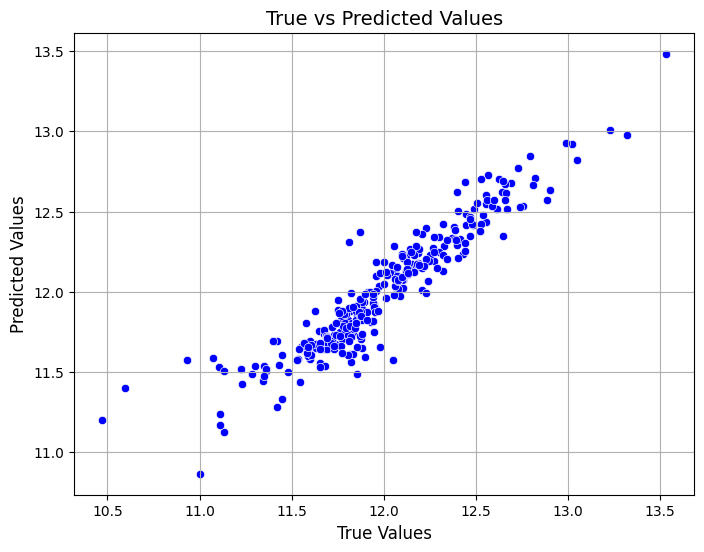

In [29]:
# Assuming pred and y_test are already defined
# Create a DataFrame with True Values and Predicted Values
results = pd.DataFrame({'True Values': y_val, 'Predicted Values': pred})

# Plot the results using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the plot size
sns.scatterplot(data=results, x='True Values', y='Predicted Values', color='blue')

# Customize the plot
plt.title('True vs Predicted Values', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)

plt.show()

In [30]:
pd.DataFrame(r.history)

,loss,val_loss
0,112.242966,59.799999
1,28.445700,17.051783
2,16.867994,13.311090
3,13.828032,10.997763
4,11.730914,9.424714
...,...,...
95,0.145136,0.770720
96,0.146687,0.729783
97,0.140575,0.720651
98,0.135494,0.738605


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

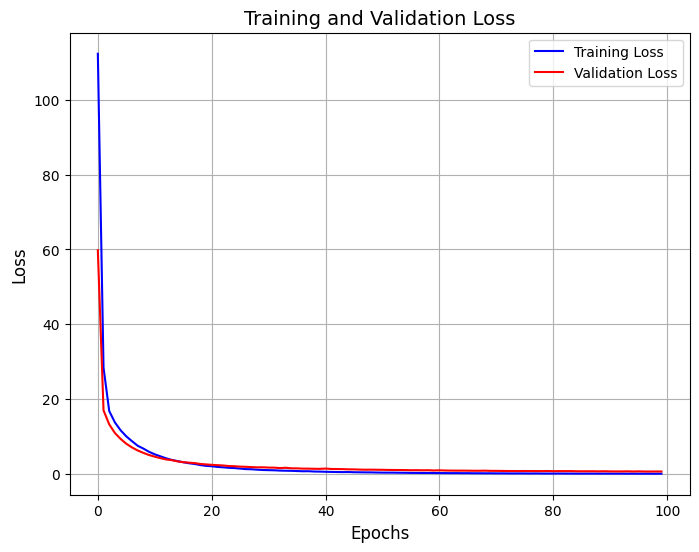

In [31]:
# Assuming r.history is the training history containing 'loss' and 'val_loss'
history_df = pd.DataFrame(r.history)

# Plotting training and validation loss using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the plot size
sns.lineplot(data=history_df, x=history_df.index, y='loss', label='Training Loss', color='blue')
sns.lineplot(data=history_df, x=history_df.index, y='val_loss', label='Validation Loss', color='red')

# Customize the plot
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

In [32]:
val_pred = model.predict(X_val)
train_pred = model.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Neural Network", *evaluate(y_val, val_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation set evaluation:
_____________________________________
MAE: 0.6171277174544512
MSE: 0.7293010279003185
RMSE: 0.8539912340886869
R2 Square -2.9081354930627383
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.17963277553153945
MSE: 0.05350042921105349
RMSE: 0.23130159794314759
R2 Square 0.6490450376189418
__________________________________


Interpretasi:
* Model mengalami overfitting yang menunjukkan performansi yang jauh lebih baik pada train set (MAE, MSE, RMSE lebih rendah dan R² positif) dibandingkan dengan validation set, di mana performa model buruk (R² negatif). Hal ini menunjukkan adanya overfitting — model terlalu menghafal train set dan gagal untuk menggeneralisasi pada data yang tidak terlihat.
* Nilai R² negatif pada validation set adalah tanda jelas bahwa model tidak menangkap pola dasar dalam data dengan baik. Model ini bahkan lebih buruk dari model yang hanya memprediksi rata-rata nilai target.

# Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

val_pred = rf_reg.predict(X_val)
train_pred = rf_reg.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_val, val_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.09707171227952119
MSE: 0.021214947866578373
RMSE: 0.1456535199251236
R2 Square 0.886314584007164
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.035483843492910595
MSE: 0.002792957809594266
RMSE: 0.05284844188426246
R2 Square 0.9816786067429245
__________________________________


Interpretasi:
* Model menunjukkan kinerja yang sangat baik pada kedua set, baik train maupun validation. Kesalahan yang sangat kecil (baik MAE, MSE, RMSE) dan R^2 yang sangat tinggi pada kedua set.
* Model tidak menunjukkan tanda-tanda overfitting karena perbedaan antara kinerja pada data latihan dan validasi tidak signifikan. Ini berarti bahwa model dapat mempelajari pola-pola dalam data tanpa terlalu menghafalnya.

# Support Vector Regressor

In [34]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000000, epsilon=0.001)
svm_reg.fit(X_train, y_train)

val_pred = svm_reg.predict(X_val)
train_pred = svm_reg.predict(X_train)

print('Validation set evaluation:\n_____________________________________')
print_evaluate(y_val, val_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_val, val_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)

Validation set evaluation:
_____________________________________
MAE: 0.11505050247481527
MSE: 0.03879845404824075
RMSE: 0.19697323180635673
R2 Square 0.7920891243243685
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0010816140326724737
MSE: 1.2099198260413705e-06
RMSE: 0.0010999635566878434
R2 Square 0.9999920631035434
__________________________________


Perbedaan performa modelnya sangat signifikan, hal ini menunjukkan bahwa terjadi overfitting pada data train. Hal ini dikarenakan:
* Kesalahan (MAE, MSE, RMSE) pada test set jauh lebih besar dibandingkan train set.
* R² pada train set sangat tinggi (mendekati 1), tetapi menurun cukup drastis pada test set.

# Model Comparison dengan y berbentuk log

In [35]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.106007,0.024120,0.155308,0.870744,0.837481
1,Ridge Regression,0.104057,0.023256,0.152500,0.875376,0.841660
2,Lasso Regression,0.171094,0.057950,0.240728,0.689461,0.738311
3,Polynomial Regression,0.179795,0.069811,0.264217,0.625903,0.000000
4,Stochastic Gradient Descent,0.208729,0.056869,0.238471,0.695256,0.000000
5,Neural Network,0.617128,0.729301,0.853991,-2.908135,0.000000
6,Random Forest Regressor,0.097072,0.021215,0.145654,0.886315,0.000000
7,SVM Regressor,0.115051,0.038798,0.196973,0.792089,0.000000


Model Terbaik: Random Forest Regressor (Model 6)

* Random Forest memberikan hasil terbaik dalam hal akurasi dan generalisasi, dengan metrik evaluasi yang konsisten baik di train maupun test se .
Risiko overfitting lebih rendah karena Random Forest adalah ensemble model yang robust terhadap no.
  
* Akan tetapi nilai Cross Validation pada Random Forest adalah 0, hal ini menunjukkan bahwa model yang diuji tidak dapat memprediksi dengan benar pada data pengujian, atau kinerjanya sangat buruk. Maka dari itu akan digunakan model alternatifnya.
  se.
* Alternatif: Jika membutuhkan model yang lebih sederhana dan cepat untuk deployment, gunakan Ridge Regression karena performanya cukup baik dengan risiko overfitting lebih rendah dibandingkan Neural Net.ork.

<Axes: ylabel='Model'>

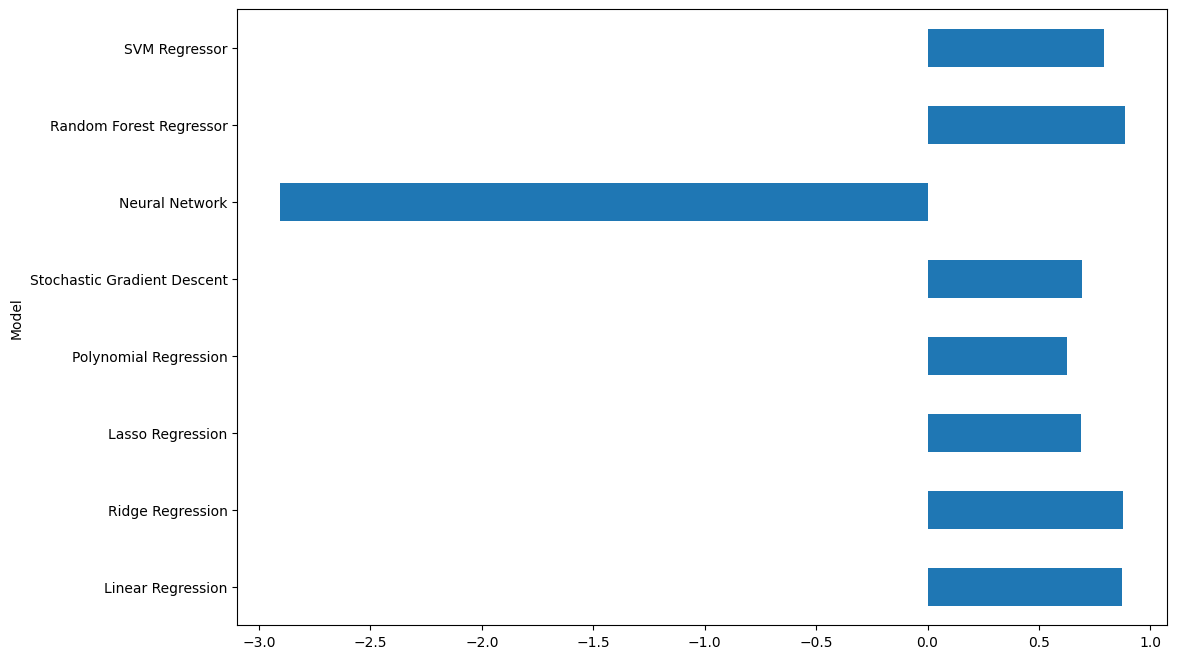

In [36]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<Axes: ylabel='Model'>

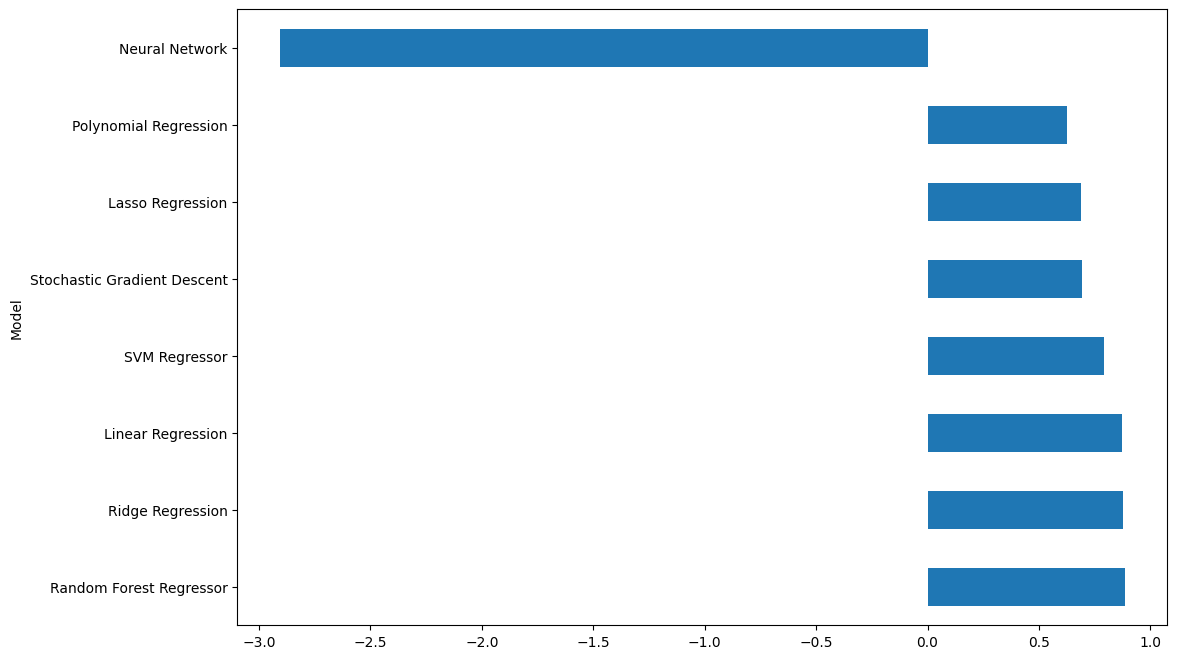

In [37]:
results_df = results_df.sort_values(by='R2 Square', ascending=False)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

# Submission Ridge Regression

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge  # Import Ridge Regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the datasets
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Separate target variable (SalePrice) and features (X)
y = np.log1p(train["SalePrice"])  # Log-transform SalePrice
X = train.drop(["SalePrice", "Id"], axis=1)

# Drop the 'Id' column from test data
test_ids = test["Id"]
test = test.drop("Id", axis=1)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Define transformers for preprocessing numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Fill missing numeric values with median
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with most frequent value
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Preprocessor: Apply transformations to both numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Initialize the Ridge model and specify solver as 'auto' to allow compatibility with cross-validation
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('regressor', Ridge(solver='lsqr'))  # Ridge Regression model with solver 'auto'
])

# Perform cross-validation for Ridge Regression
scores = cross_val_score(model, X, y, cv=5, scoring="neg_root_mean_squared_error")

# Calculate the mean RMSE across folds (neg_root_mean_squared_error returns negative values)
mean_rmse = -scores.mean()

# Print the cross-validation RMSE result
print(f"Cross-Validation RMSE: {mean_rmse}")

# Predict SalePrice for the test dataset
test_predictions = model.fit(X, y).predict(test)

# Reverse the log-transformation of predictions
test_predictions = np.expm1(test_predictions)

# Create the submission DataFrame
submission = pd.DataFrame({"Id": test_ids, "SalePrice": test_predictions})

# Save the submission to a CSV file
submission.to_csv("submission.csv", index=False)
print("Submission file created: submission.csv")

Cross-Validation RMSE: 0.18817484200356885
Submission file created: submission.csv
